In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/BankNoteAuthentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


<Axes: xlabel='variance'>

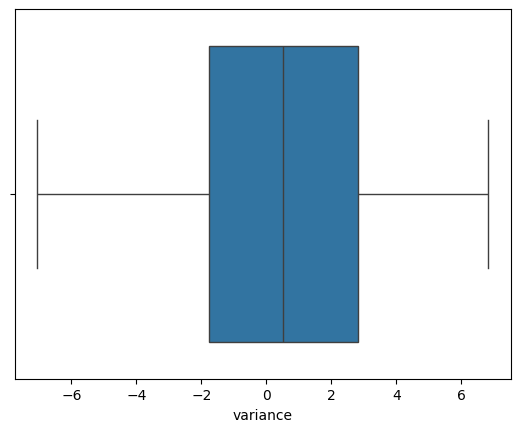

In [3]:
sns.boxplot(x=df['variance'])

<Axes: xlabel='skewness'>

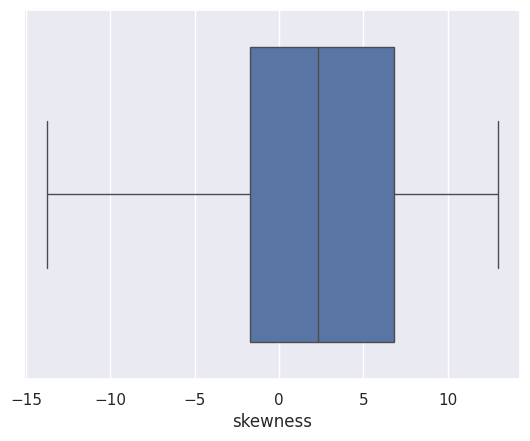

In [5]:
sns.boxplot(x=df['skewness'])

<Axes: xlabel='curtosis'>

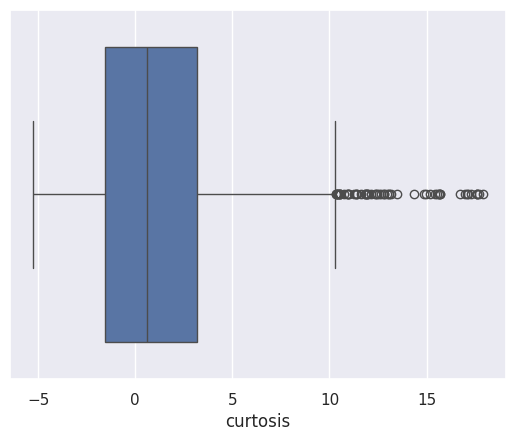

In [6]:
sns.boxplot(x=df['curtosis'])

<Axes: xlabel='entropy'>

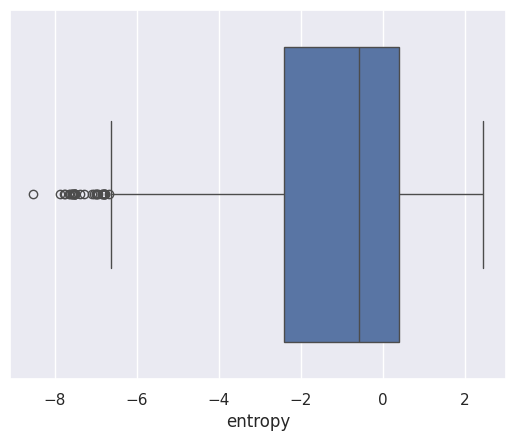

In [8]:
sns.boxplot(x=df['entropy'])

In [3]:
z = np.abs(stats.zscore(df))
data_clean = df[(z<2).all(axis=1)]
data_clean

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.80730,-0.44699,0
1,4.54590,8.16740,-2.45860,-1.46210,0
2,3.86600,-2.63830,1.92420,0.10645,0
3,3.45660,9.52280,-4.01120,-3.59440,0
4,0.32924,-4.45520,4.57180,-0.98880,0
...,...,...,...,...,...
1363,-1.16670,-1.42370,2.92410,0.66119,1
1366,-2.41000,3.74330,-0.40215,-1.29530,1
1367,0.40614,1.34920,-1.45010,-0.55949,1
1368,-1.38870,-4.87730,6.47740,0.34179,1


In [4]:
data_clean['class'].value_counts()

,count
class,
0,727
1,483


<Axes: xlabel='class', ylabel='count'>

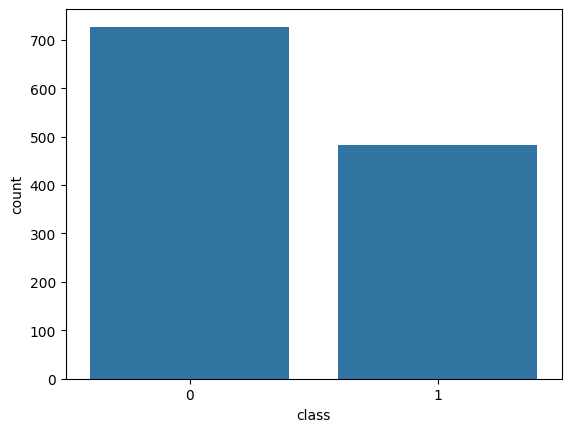

In [5]:
sns.countplot(data=data_clean, x='class')

In [4]:
df_maj = data_clean[data_clean['class']==0]
df_min = data_clean[data_clean['class']==1]

df_min_upsam = resample(df_min,replace=True,n_samples=727,random_state=123)

df_concat = pd.concat([df_maj,df_min_upsam])
df_concat

,variance,skewness,curtosis,entropy,class
0,3.621600,8.66610,-2.80730,-0.44699,0
1,4.545900,8.16740,-2.45860,-1.46210,0
2,3.866000,-2.63830,1.92420,0.10645,0
3,3.456600,9.52280,-4.01120,-3.59440,0
4,0.329240,-4.45520,4.57180,-0.98880,0
...,...,...,...,...,...
1002,-1.710400,-4.77800,6.21090,0.39740,1
1117,-1.988100,0.99945,-0.28562,-0.70044,1
1270,-0.743240,-0.32902,-0.42785,0.23317,1
845,-3.882600,4.89800,-0.92311,-5.08010,1


,count
class,
0,727
1,727


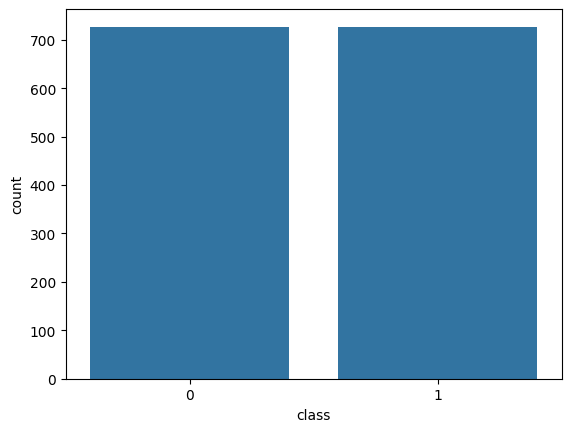

In [9]:
sns.countplot(data=df_concat, x='class')
df_concat['class'].value_counts()

<Axes: >

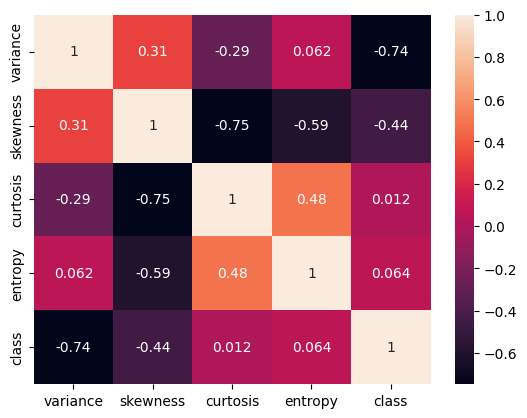

In [10]:
sns.heatmap(df_concat.corr(),annot=True)

In [5]:
x = df_concat.drop('class',axis=1)
y = df_concat['class']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

Accuracy Score: 97.94
[[144   5]
 [  1 141]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       149
           1       0.97      0.99      0.98       142

    accuracy                           0.98       291
   macro avg       0.98      0.98      0.98       291
weighted avg       0.98      0.98      0.98       291



<Axes: >

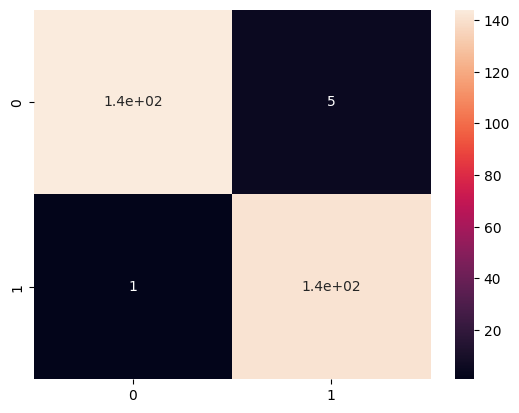

In [7]:
y_pred = dt.predict(x_test)
print("Accuracy Score:",round(accuracy_score(y_test,y_pred)*100,2))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [9]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfcy_pred = rfc.predict(x_test)
print("Accuracy Score:",round(accuracy_score(y_test,rfcy_pred)*100,2))

Accuracy Score: 99.66


In [11]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgby_pred = rfc.predict(x_test)
print("Accuracy Score:",round(accuracy_score(y_test,xgby_pred)*100,2))

Accuracy Score: 99.66


In [12]:
log = LogisticRegression()
log.fit(x_train,y_train)
logy_pred = rfc.predict(x_test)
print("Accuracy Score:",round(accuracy_score(y_test,logy_pred)*100,2))

Accuracy Score: 99.66


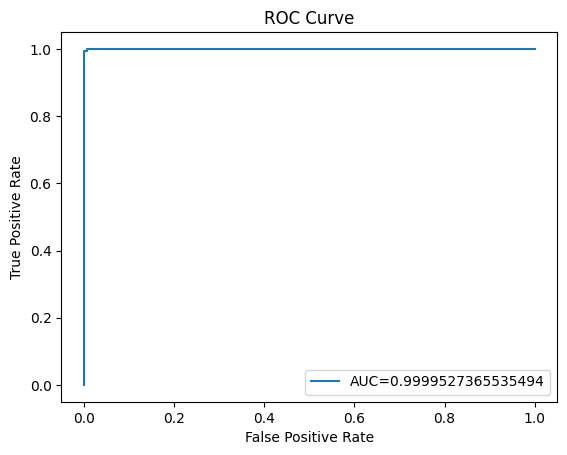

In [21]:
pred_proba = xgb.predict_proba(x_test)[:, 1]

df_ap = pd.DataFrame({'y_actual': y_test.reset_index(drop=True), 'pred_proba': pred_proba})

fpr, tpr, tr = roc_curve(df_ap['y_actual'],df_ap['pred_proba'])
auc = roc_auc_score(df_ap['y_actual'], df_ap['pred_proba'])

plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
# plt.show()

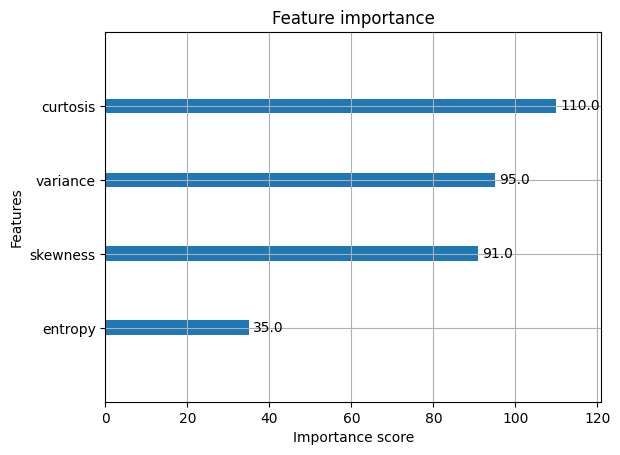

<Figure size 1000x1000 with 0 Axes>

In [22]:
plot_importance(xgb)
plt.figure(figsize=(10,10))
plt.show()